In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("bank_marketing/bank/bank-full.csv", sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
data = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']]

In [6]:
pd.set_option('future.no_silent_downcasting', True)
data['y']= df['y'].replace({'yes':1, 'no': 0})

In [7]:
data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
36420,49,management,single,secondary,no,-18,yes,no,cellular,11,may,217,3,264,4,failure,0
25406,32,management,married,secondary,no,1477,yes,no,cellular,18,nov,111,1,-1,0,unknown,0
44458,52,housemaid,married,primary,no,256,no,no,cellular,6,aug,137,1,-1,0,unknown,0
37614,32,services,single,unknown,no,6145,yes,no,cellular,14,may,362,1,287,13,failure,0
6592,29,blue-collar,married,primary,no,1615,yes,no,unknown,28,may,551,1,-1,0,unknown,0
3246,60,retired,married,secondary,no,2086,yes,no,unknown,15,may,182,2,-1,0,unknown,0
31142,44,management,married,primary,no,558,no,no,cellular,19,feb,268,5,-1,0,unknown,1
34677,39,blue-collar,single,secondary,no,519,yes,yes,cellular,5,may,180,3,166,15,failure,0
33130,31,technician,single,secondary,no,1222,yes,no,cellular,20,apr,186,3,-1,0,unknown,0
19985,40,technician,married,secondary,no,84,yes,no,cellular,8,aug,119,3,-1,0,unknown,0


In [8]:
# Question 1: Mode for the column `education`
# Answer: The mode is `secondary`

data['education'].mode()

0    secondary
Name: education, dtype: object

In [9]:
# Question 2. Two features with the biggest correlation

data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [10]:
# To check correlation, we need only numeric columns ie `int64` dtype columns
numeric_col = data.select_dtypes(include=['int64'])
print(numeric_col.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


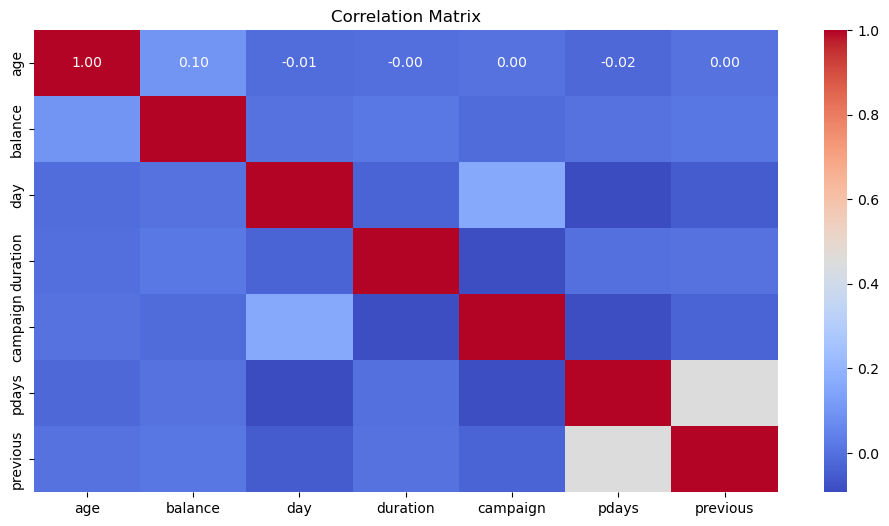

In [11]:
corr_matrix = numeric_col.corr()

# visualizing using `heatmap`
plt.figure(figsize=(12,6))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Answer: `pdays` and `previous`

In [12]:
# Question 3. Variable with the biggest mutual information score
# Answer: Checking unique values in each column we see that poutcome has the largest mutual information score

data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [13]:
# for col in data.columns:
#     print(f"Unique values in '{col}': \n {data[col].unique()} \n")

Unique values in 'age': 
 [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88] 

Unique values in 'job': 
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 

Unique values in 'marital': 
 ['married' 'single' 'divorced'] 

Unique values in 'education': 
 ['tertiary' 'secondary' 'unknown' 'primary'] 

Unique values in 'default': 
 ['no' 'yes'] 

Unique values in 'balance': 
 [ 2143    29     2 ...  8205 14204 16353] 

Unique values in 'housing': 
 ['yes' 'no'] 

Unique values in 'loan': 
 ['no' 'yes'] 

Unique values in 'contact': 
 ['unknown' 'cellular' 'telephone'] 

Unique values in 'day': 
 [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31] 

Unique values in '

In [14]:
# Identify categorical columns in your DataFrame

X= data.drop(columns=['y']) # Independent variables
y= data['y'] # target variable
y=y.astype(int)

In [15]:
# Split 60% for training and 40% for val/test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split 20% for validation and 20% for testing from the remaining 40%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Print shapes of resulting splits to check
print("Training set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_val.shape, y_val.shape)
print("Test set size:", X_test.shape, y_test.shape)

Training set size: (27126, 16) (27126,)
Validation set size: (9042, 16) (9042,)
Test set size: (9043, 16) (9043,)


In [19]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['category', 'object']).columns

# Convert categorical columns to 'category'
X_train[categorical_cols] = X_train[categorical_cols].apply(lambda col: col.astype('category'))

# Calculate mutual information scores for categorical columns
mi_scores = mutual_info_classif(X_train[categorical_cols], y_train, discrete_features=True)

# Create a DataFrame to store the results
mi_scores_df = pd.DataFrame({'Feature': categorical_cols, 'MI Score': mi_scores})

# Round the MI scores to 2 decimal places
mi_scores_df['MI Score'] = mi_scores_df['MI Score'].apply(lambda score: round(score, 2))

# Display the mutual information scores
print(mi_scores_df.sort_values(by='MI Score', ascending=False))

     Feature  MI Score
8   poutcome      0.03
7      month      0.02
0        job      0.01
4    housing      0.01
6    contact      0.01
1    marital      0.00
2  education      0.00
3    default      0.00
5       loan      0.00


In [25]:
# # Mutual Info scores
# Answer


# One-Hot Encode the categorical variables in the training and validation sets

encoder = OneHotEncoder(drop='first', sparse_output=False)  # to avoid multicollinearity

# Fit the encoder on the training data and transform both train and validation sets
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]))
X_val_encoded = pd.DataFrame(encoder.transform(X_val[categorical_cols]))

# Reset index to ensure alignment of rows after one-hot encoding
X_train_encoded.index = X_train.index
X_val_encoded.index = X_val.index

# Drop the original categorical columns and concatenate the one-hot encoded columns
X_train_final = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded], axis=1)
X_val_final = pd.concat([X_val.drop(columns=categorical_cols), X_val_encoded], axis=1)
X_train_final.columns = X_train_final.columns.astype(str)
X_val_final.columns = X_val_final.columns.astype(str)

In [26]:
# Train the logistic regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [27]:
# Question 4. Accuracy on the validation dataset
# Answer: 0.9

# Predict on the validation dataset
y_val_pred = model.predict(X_val_final)

# Calculate the accuracy and round it to 2 decimal places
accuracy = accuracy_score(y_val, y_val_pred)
accuracy = round(accuracy, 2)

# Display the accuracy
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9


In [30]:
# Question 5. Feature with the smallest difference
# Answer: `balance`

# Set the baseline accuracy to our calculated accuracy
baseline_accuracy = accuracy

# Initialize a list to store accuracy differences
accuracy_differences = {}

# Iterate over each feature to exclude it and retrain the model
for feature in X_train_final.columns:
    # Create a new training set without the current feature
    X_train_without_feature = X_train_final.drop(columns=[feature])
    X_val_without_feature = X_val_final.drop(columns=[feature])
    
    # Train the model without the current feature
    model_without_feature = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_without_feature.fit(X_train_without_feature, y_train)
    
    # Calculate accuracy on the validation set
    accuracy_without_feature = accuracy_score(y_val, model_without_feature.predict(X_val_without_feature))
    
    # Calculate the difference in accuracy
    accuracy_difference = np.abs(baseline_accuracy - accuracy_without_feature)
    
    # Store the difference in the dictionary
    accuracy_differences[feature] = accuracy_difference

# Convert results to a DataFrame for better visualization
accuracy_differences_df = pd.DataFrame(list(accuracy_differences.items()), columns=['Feature', 'Accuracy Difference'])
accuracy_differences_df = accuracy_differences_df.sort_values(by='Accuracy Difference', ascending=False)

# Display the results
print("Accuracy Differences:\n", accuracy_differences_df)

Accuracy Differences:
      Feature  Accuracy Difference
40        33             0.007388
3   duration             0.005950
36        29             0.001902
34        27             0.001194
27        20             0.001194
13         6             0.001128
15         8             0.001128
4   campaign             0.001017
37        30             0.001017
6   previous             0.001017
35        28             0.000907
31        24             0.000752
16         9             0.000686
41        34             0.000686
33        26             0.000686
26        19             0.000575
22        15             0.000464
25        18             0.000464
21        14             0.000464
10         3             0.000464
24        17             0.000420
19        12             0.000354
2        day             0.000354
39        32             0.000354
23        16             0.000354
5      pdays             0.000354
7          0             0.000354
20        13             

In [29]:
# To confirm

# Get the coefficients and the feature names
coefficients = model.coef_[0] 
feature_importance = np.abs(coefficients)  

# Step 3: Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': feature_importance
})

# Step 4: Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print("Feature Importance:\n", importance_df)

Feature Importance:
      Feature  Importance
40        33    1.967476
27        20    1.608480
31        24    1.119300
34        27    1.102504
36        29    1.092293
32        25    1.039109
37        30    0.966842
28        21    0.870274
24        17    0.748143
38        31    0.667414
41        34    0.570017
35        28    0.568021
30        23    0.427112
25        18    0.414297
18        11    0.390588
9          2    0.376885
11         4    0.372084
7          0    0.289016
12         5    0.281270
29        22    0.277204
21        14    0.258802
13         6    0.257851
8          1    0.254187
14         7    0.253141
15         8    0.197411
33        26    0.193600
16         9    0.158035
10         3    0.151140
17        10    0.142154
39        32    0.110869
4   campaign    0.093709
26        19    0.070090
20        13    0.057492
22        15    0.045079
19        12    0.039328
6   previous    0.012179
0        age    0.006321
23        16    0.005294
3   

In [31]:
# Question 6. Smallest `C` that leads to the best accuracy on the validation set 
# Answer: 10

# List of C values to try
C_values = [0.01, 0.1, 1, 10, 100]

# Dictionary to store accuracy results
results = {}

# Train models and evaluate accuracy on validation set
for C in C_values:
    # Create and train the logistic regression model with regularization
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train_final, y_train)
    
    # Make predictions on the validation set
    y_val_pred = model.predict(X_val_final)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    
    # Store the accuracy in the results dictionary
    results[C] = round(accuracy, 3)

# Display the results
print("Validation Set Accuracies for Different C Values:")
for C, accuracy in results.items():
    print(f"C = {C}: Accuracy = {accuracy}")

Validation Set Accuracies for Different C Values:
C = 0.01: Accuracy = 0.897
C = 0.1: Accuracy = 0.9
C = 1: Accuracy = 0.9
C = 10: Accuracy = 0.901
C = 100: Accuracy = 0.901
